# MNIST using Tensorflow + Keras - Prediction

Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

load data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# normalize pixel value
x_train  = x_train / 255.0
x_test = x_test / 255.0

build the model

In [3]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

c:\Users\acer\miniconda3\envs\ds_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile the model

In [4]:
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

train the model

In [5]:
model.fit(x_train,y_train, epochs=8, validation_split=0.1)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8494 - loss: 0.5117 - val_accuracy: 0.9657 - val_loss: 0.1294
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9507 - loss: 0.1689 - val_accuracy: 0.9727 - val_loss: 0.0939
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9634 - loss: 0.1203 - val_accuracy: 0.9755 - val_loss: 0.0860
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9706 - loss: 0.0942 - val_accuracy: 0.9778 - val_loss: 0.0808
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9755 - loss: 0.0788 - val_accuracy: 0.9798 - val_loss: 0.0728
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9783 - loss: 0.0676 - val_accuracy: 0.9782 - val_loss: 0.0774
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9811 - loss: 0.0595 - val_accuracy: 0.9810 - val_loss: 0.0726
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0521 - val_acc

evaluate model

In [6]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"\n Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0832

 Test Accuracy: 0.9781


predict digit from test set

In [7]:
predictions = model.predict(x_test)
def show_prediction(index):
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    plt.title(f" Predicted: {np.argmax(predictions[index])}, True: {y_test[index]}")
    plt.axis('off')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


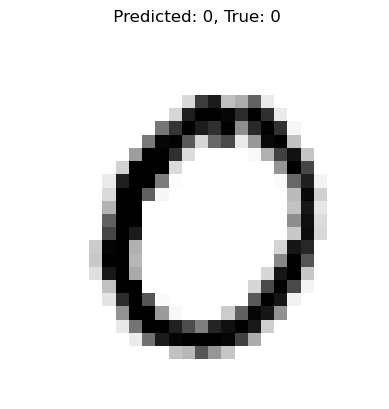

In [8]:
show_prediction(101)

save model

In [9]:
model.save("mnist_model.h5")
print("Model saved as mnist_model.h5")

Model saved as mnist_model.h5
